# Fundamentos de Orquestração

tem como objetivo fazer com que diferentes etapas (pipelines) de uma operação estejam sintonizadas, coordenadas e ocorram, de modo esperado, de acordo com um trigger

o histórico de orquestração se inicia com a **pre-Unix era** onde eram realizados processos em batch de modo manual. suas limitações eram que, devido à sua manualidade, era sujeita a erros dificeis de detectar e debugar, bem como a falta de padrão de formato de dados, protocolos e técnicas de processamento

a era seguinte foi a **early-computing era**. aqui eram feitos usos de CRON, AutoSys e Informatica, softwares que serviam para schedular tarefas e processos de modo mais prático que o anterior e dedicados ao ETL. suas limitações se deviam aos proprietários dos softwares, que encareciam a orquestração, e também a falta de features para realização de workloads de maior complexicidade e manutenção geral

em seguida teve-se **data & open-source renaissence**. aqui ferramentas open-source como Luigi, Azkaban e Oozie nasciam e houve um aumento na complexicidade de dados e seus tamanhos, aumento da complexicidade de realizar schedules de ETL e o aumento de desenvolvimento de projetos open-source para gerenciamento de workflows. suas limitações eram que algumas ferramentas suportavam somente Hadoop, outras somente XML ou arquivos de configuração, além de apresentar dinamismo, escalabilidade e extensibilidade

por fim temos o nosso presente momento a **modern data orchestration** onde temos ferramentas como Dagster e Airflow, cada qual com seu paradigma. O Airflow tem como vantagens ter seus pipelines definidos via código em Python, habilidade de integração com muitos sistemas externos, schedule baseados em tempo e eventos e features ricas em observabilidade devido a sua UI na porta 8080

# Apache Airflow - Aspectos Teóricos

## **O que é, quais as vantagens, suas principais características e aplicações**

**se trata de uma ferramenta de orquestração de modo autoral via código, scheduling e monitoramente de pipelines**

apresenta como vantagens:

*   tem seus pipelines escritos em Python

*   é um projeto open-source

*   tem uma grande comunidade

*   fornece uma UI que facilita a observabilidade dos seus pipelines

*   permite schedular baseado em tempo ou eventos

*   é altamente extensível, com diversas integrações e permite a construção de novas integrações se necessário

algumas das pessoas que utilizam Airflow são:

*   Engenheiro de dados: constrói pipelines com o intuito de fazer a infraestrutura da corporação, além de fazer a manutenção e gerenciamento dos mesmos

*   Cientista de dados: construção de pipelines que fazem um pré-processamento de dados e analisar novos datasets

*   Analista de dados: criação de pipelines que extraem de uma DB via SQL dados que alimentam um dashboard ou relatório

*   Engenheiro de ML: faz uso de orquestração para retreinar e validar uma ML   

*   Dentre outros

algumas de suas aplicações são:

*   data-powered applications: são aplicações que são sistemas ou programas cujo propósito é atribuir dados a funções, resultando num valor

*   critical operations processes: se tratam de processos que se referem a workflows essenciais para o funcionamento da empresa

*   analytics & reporting: compete ao processo de análises sistemáticas de dados gerando como resultados, por exemplo, um dashboard, que deve ser atualizado constantemente mediante a novos dados

*   MLOps & AI: envolve deploys e gerenciamento de modelos de ML dentro de workflows operacionais

algumas considerações devem ser feitas ao usar Airflow:

*   **não é uma ferramenta de ETL e sim de orquestração**. pode ser feito ETL dentro do Airflow, mas é complicado solucionar eventuais problemas e bugs, não sendo recomendado

*   **não é uma ferramenta de streaming. ela atua em batches** porém, se acoplada ao Kafka, pode sim atuar no ramo de streaming

*   demanda de infraestrutura para ter escalabilidade

## **Directed-Acyclic Graph (DAG)**

constitui o principal objeto do airflow

descreve o fluxo dos processos com que serão orquestradas as tasks

**o paradigma de orquestração é com foco nas tasks, desse modo, os nodes são o que cada task realiza**

a DAG é acíclica e direta pois, desse modo evita conflitos com as dependências entre elas mesmas, evitando o colapso do processo

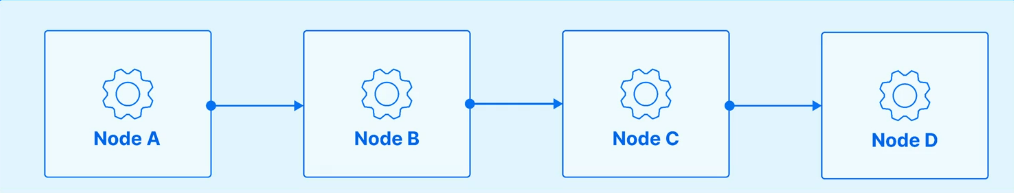

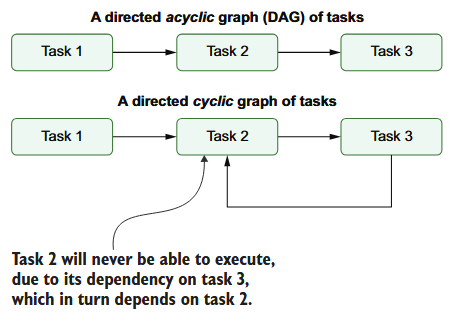

**uma das vantagens do uso de DAGs é o fato de ela permitir que tarefas independentes possam ser executadas concomitantemente por meio de paralelismo, aumentando a eficiência de processos se comparado a um bloco monolítico de códigos**

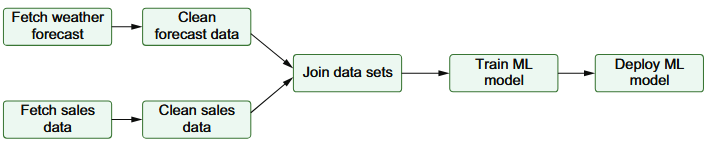

**outra vantagem é observada em situações onde há quebras. no caso de uma DAG o problema pode ser solucionado consertando somente a Task problemática e reexecutá-la. no caso de quebras em um bloco monolítico de códigos, é necessário fazer o debug e rodar todo o código novamente, reduzindo performance**

**logical_date/execution_date** diz respeito ao intervalo de tempo em que se iniciou a DAG run

**duration/current interval** diz respeito à duração que a DAG run levou para ser executada

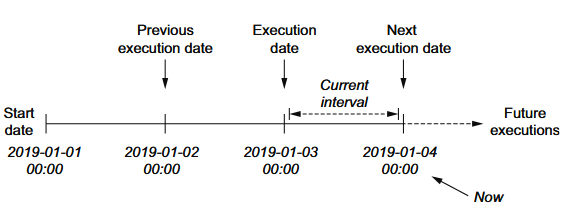

**quando pausado uma DAG e feito o restart da mesma, as contagens de runs zeram e voltam a ser contabilizadas após o restart**

**catchup** consiste no processo de, ao pausar uma DAG e fazer o restart, as DAGs executadas serão somente aquelas que não foram engatilhadas (sofreram o processo de trigger) entre o atual momento e a ultima vez que ela foi executada completamente

**backfill** é o processo onde todas as runs de DAGs de modo histórico são executadas novamente, mesmo as que não foram engatilhadas. **disponível somente no CLI**. esse procedimento é útil para, por exemplo, recriar um dataset que fora elaborado em outras runs da DAG. ao limpar os resultados de execuções passadas você também pode usar esse recurso para executar facilmente quaisquer tarefas históricas se você fizer alterações em suas Tasks, permitindo que você reprocesse facilmente um dataset inteiro quando necessário

para DAGs engatilhadas por datas (todos os dias por exemplo) e que extraem dados de uma base que, por exemplo se atualiza a cada 30 dias, é ineficiente realizar a análise de todo seu catalogo. para tal podemos contornar essa situação fazendo partições de extrações de modo diário, exportando para cada dia de extração um novo arquivo

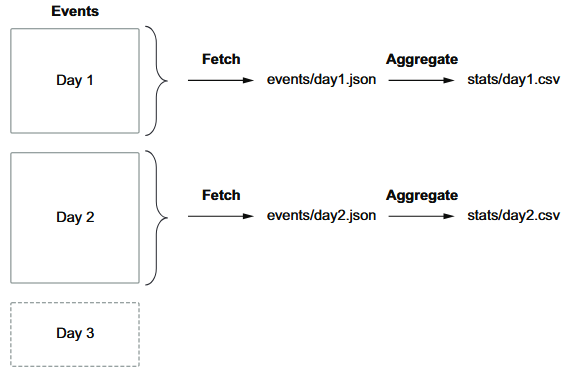

fazendo uso da notação Jinja `{{nome_da_variável}}` podemos acessar variaveis de ambientes do Apache Airflow como por exemplo `execution_date`, `previous_execution_date`, `next_execution_date`, dentre outras. no exemplo a seguir, elas são implementadas como parametros de query dentro da propria URL

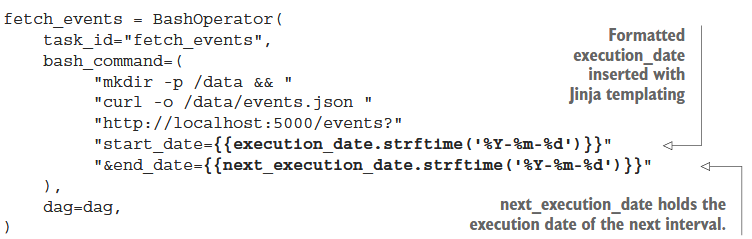

como o uso desses parametros são muito recorrentes o proprio Apache Airflow nos fornece abreviaturas destes parametros facilitando nosso trabalho:

*   **ds** = retorna a data de schedule no formato YYYY-MM-DD

*   **ds_nodash** = retorna a data de schedule no formato YYYYMMDD

*   **next_ds** = retorna a proxima data de schedule no formato YYYY-MM-DD

*   **next_ds_nodash** = retorna a proxima data de schedule no formato YYYYMMDD

*   **prev_ds** = retorna a data do schedule anterior no formato YYYY-MM-DD

*   **prev_ds_nodash** = retorna a data do schedule anterior no formato YYYYMMDD

usando estes parametros simplificados o snippet acima fica da seguinte maneira

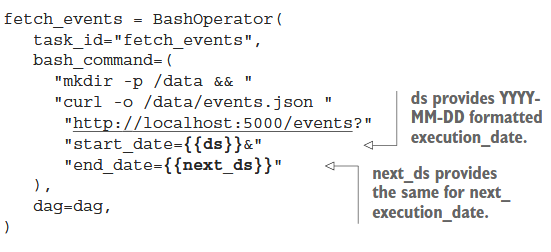

esses parametros podem ser aproveitados ainda para fazer partições de dados com base na data do schedule como por exemplo:

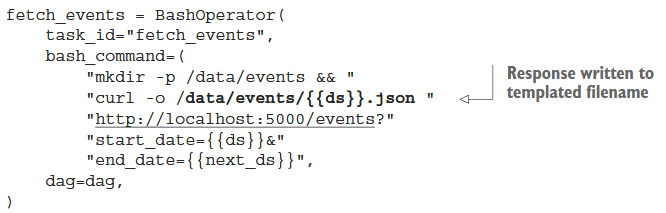

## **Task**

é uma unidade do node da DAG como citado anteriormente

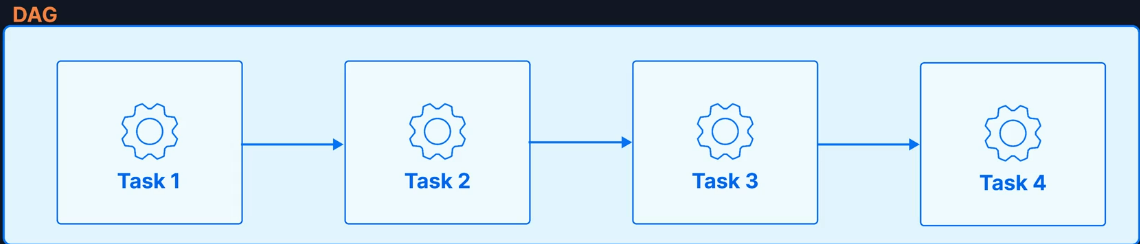

Tasks tem como função envolver os Operators, gerenciar sua execução e verificar se está funcionando corretamente

permite ao usuário focar mais no trabalho que deve ser feito via Operators e menos no processo de execução

## **Operator**

**tem como proposta executar um específico trecho de código para uma task específica**

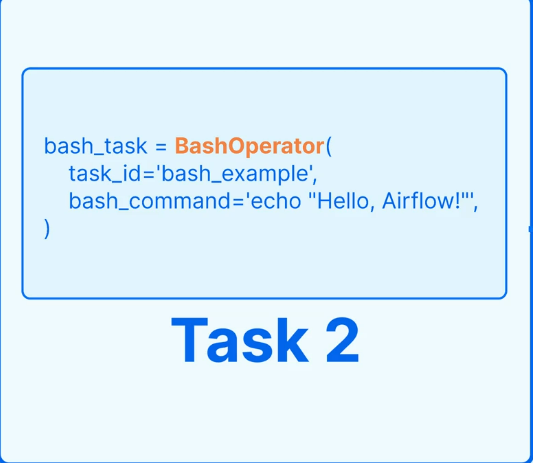

existem 3 tipos de operators:

1.  **Action**: são operadores que executam uma tarefa, como por exemplo o **PostgresOperator** e o **PythonOperator**

2.  **Transfer**: tem como função realizar a transferência de dados, como por exemplo o **S3toSnowflakeOperator**

3.  **Sensor**: fazem com que o código aguarde por um evento para somente então realizar uma task, como por exemplo o **FileSensor**

Operators permitem processar um dado trecho de código em Bash, por exemplo, e em seguida, rodar esse output como um imput em um código Python

## **Connections**

um conjunto de parâmetros como login, senhas, hostname, dentre outros, que permite a conexão de DAG a sistemas externos, como por exemplo Snowflake ou uma API de modo criptografado para alguns parâmetros

## **XCom**

usado para **transferencia de dados e dados entre tasks**

**faz uso da metadata database ao inves de um sistema externo**

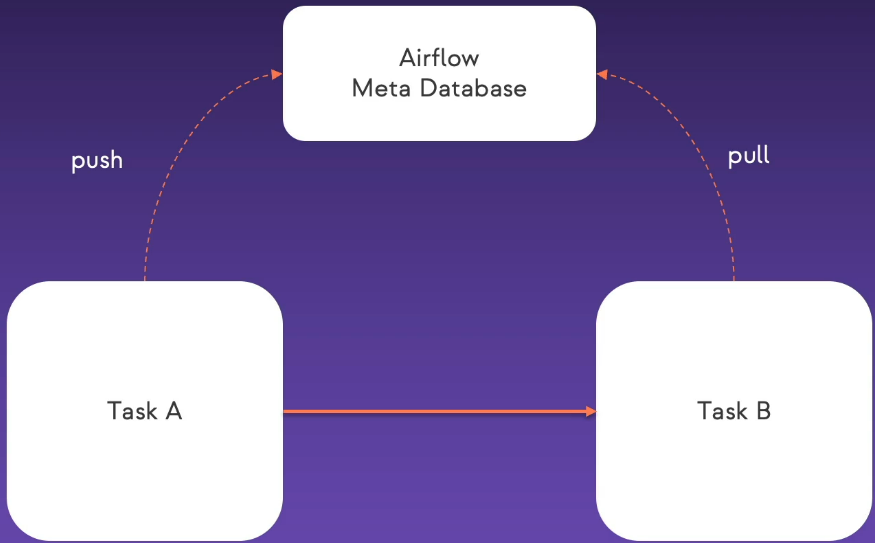

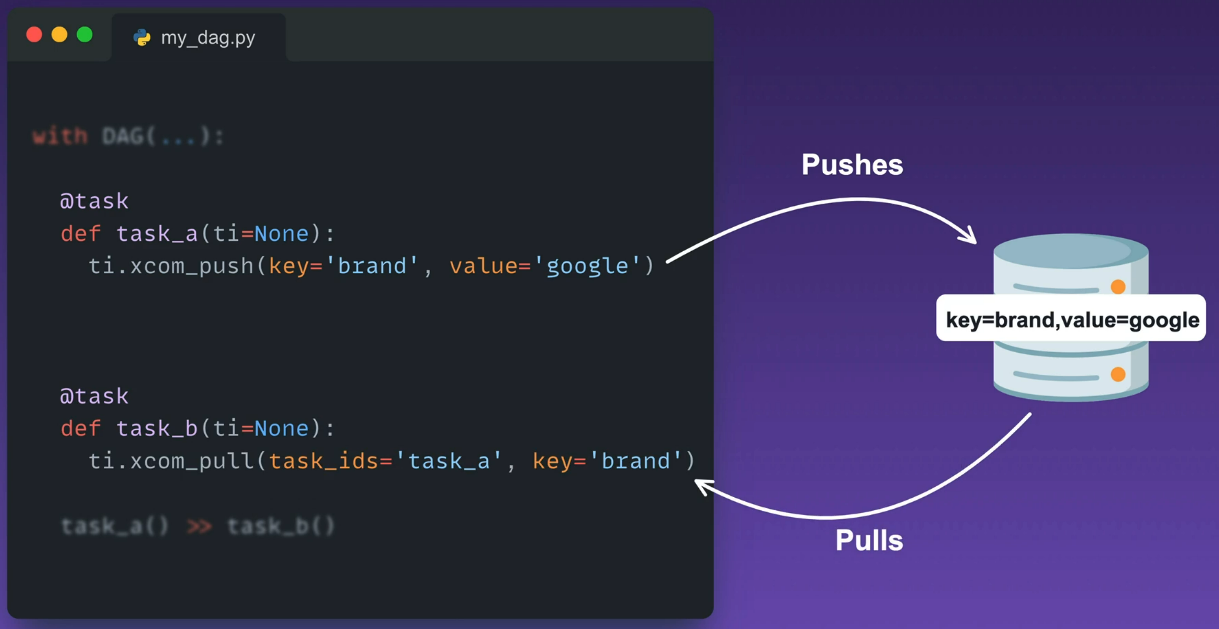

**suas limitações são:**

*   tamanho de dados que se deseja compartilhar

*   o tipo de database usado como metadata database: o tamanho dos arquivos permitidos a serem compartilhados é limitado pelo tipo de metadata database (MySQL 64 MB, PostgreSQL 1GB, SQLlite 2 GB)

*   os arquivos compartilhados entre XCOMs devem ser serializáveis em JSON, aceita também classes decoradas com `@dataclass` e `@attr.define`

muitos Operators e `@task` aceitam um kwarg `return_value:Optional[str]=None` que faz com que o valor passado a ele seja a key_id da XCom se `do_xcom_push:Optional[bool]=True`

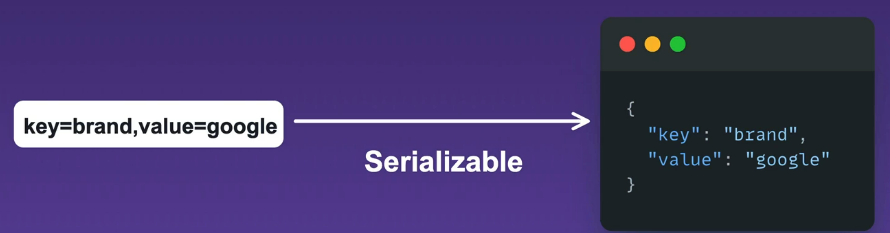

XCom's podem ser armazenadas em locais como S3 ao inves da metadata database usando o terminal `airflow config list` e definido suas variaveis na seção common.io como `xcom_objectstorage_path`, `xcom_objectstorage_threshold` (define o tamanho maximo para o arquivo a ser executado pelo metadata database) e `xcom_objectstorage_compression`. para a integração ser feita com sucesso, o valor de `xcom_backend`, situado no core, deve ser setado para `airflow.providers.common.io.xcom.backend.XComObjectStorageBackend`, dado que por padrão ele usa uma XCom generica

## **Variáveis**

funcionam como variaveis comum em python

tem como intuito evitar o hard coding entre DAGs que consomem da mesma coisa

**facilitam o update de DAGs uma vez que se alterado o valor da variável, todas irão se alterar**

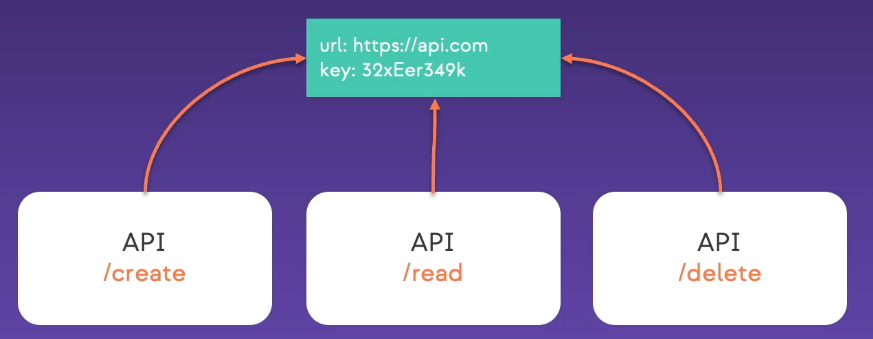

tem corpo de um dicionário python com 3 parametros bem definidos

**compostas de :**

*   **key**

*   **value** deve ser serializável em JSON

*   **description**

*   ****
em suma:

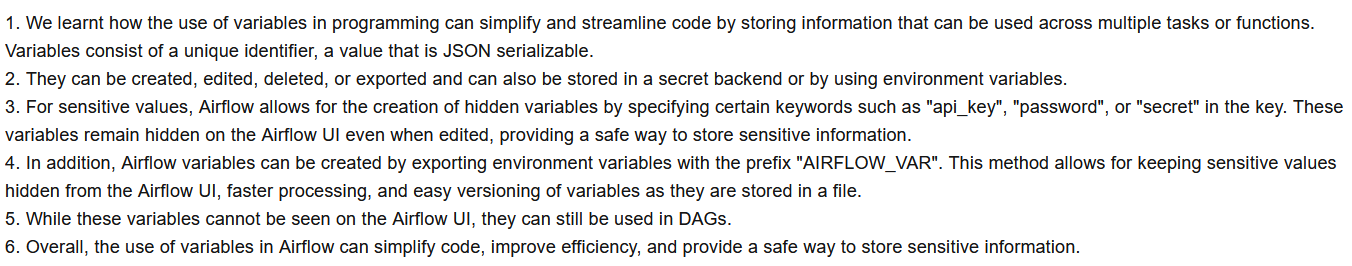

## **Sensores**

**tem como propósito aguardar um dado evento acontecer**

situações em que são úteis:

*   processamento de dados de um data lake (S3 bucket por exemplo) de modo que seja feito somente quando eles são alterados

*   execução de diferents Tasks dentro de uma mesma DAG em tempos diferentes

*   engatilhar um pipeline quando outro for finalizado

*   garantir que uma API está pronta para ser acessada

*   transformação de dados assim que estes estiverem presentes em uma tabela SQL

**cuidados a serem tomados quando utilizado sensores:**

*   evitar o freezing (congelamento) da instância do Apache Airflow

## **Arquitetura Geral de uma DAG**

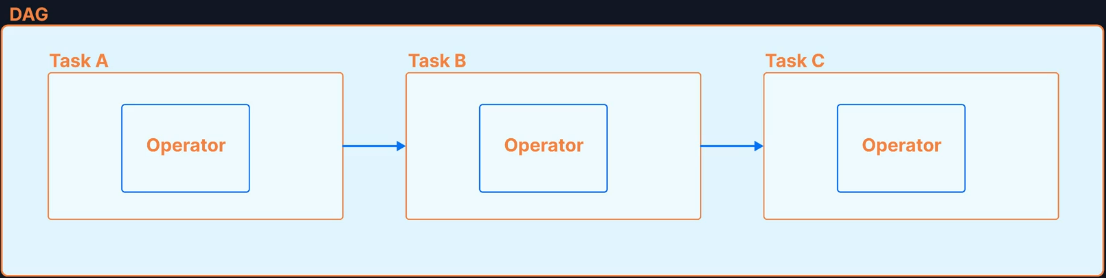

## **Arquitetura Geral do Apache Airflow**

componentes:

*   **dags**: pasta onde se encontram alocadas as DAGs e suas Tasks

*   **webserver**: responsável por facilitar via UI o monitoramento de DAGs e é executado na porta 8080. é um webserver rodado em Flask e GUnicorn no Airflow 2.0 e vai ser substituído por React no Airflow 3.0

*   **metadata database**: responsável por armazenar metadados das DAGs, tasks, usuários, etc. geralmente é um RDBMS do tipo PostgreSQL, MySQL, SQLite, dentre outros. acompanha todo o processo de DAG run

*   **scheduler**: tem como função monitorar novas DAGs, serializar novas DAGs no metadata database, schedular pipelines (determinar qual e quando executar cada task), submeter Tasks ao executor e registrar na metadata database que uma DAG foi executada, bem como seu resultado

*   **executor**: um componente interno do scheduler e que tem como funcionalidade definir como e em qual sistema a task deve ser executada, por exemplo um cluster Kubernetes ou de modo local. podemos definir nosso proprio executor se necessário

*   **queue**: é interna ao executor e tem como papel definir a ordem de execução correta das tasks como especificado no pipeline. pode ser interna ou externa, dependendo do tipo de executor usado

*   **worker**: é o componente que recebem as tasks da queue e as executa. também tem como função armazenar o resultados das tasks na metadata database após sua a conclusão de cada task

*   **triggerer**: tem como função fazer o gerenciamento de um tipo específico de operators denominados de deferrable operators

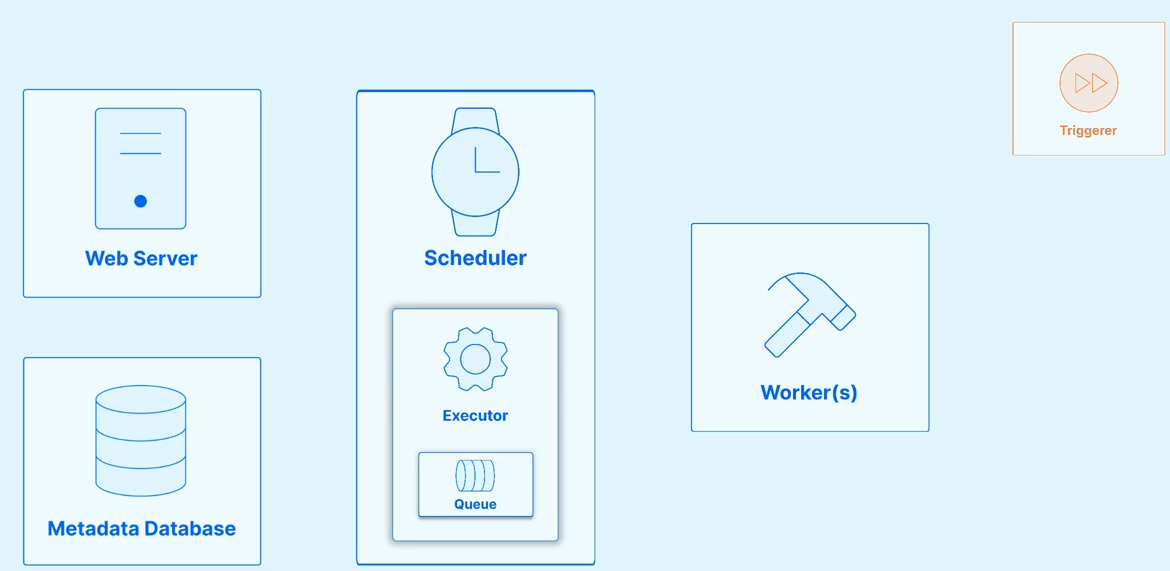

## **Fluxo de Processamento Geral de DAGs na Arquitetura do Apache Airflow**

as dags ficam organizadas por padrão numa pasta nomeada de **dags**

1.  o scheduler atua de modo contínuo scaneando a pasta dags (por padrão a cada 5 minutos) e, quando uma nova DAG é detectada, o scheduler faz a serialização e processamento desta nova DAG e a armazena no metadata database

2.  após o armazenamento no metadata database, o scheduler continua buscando DAGs que estão prontas para serem executadas a cada 5 segundos na metadata database

3.  quando detectadas DAGs prontas para execução, o scheduler passa suas tasks para a queue

4.  assim que um worker está disponível, a task é designada a ele com o intuito de ser executada

5.  após a execução, a metadata database é atualizada por componentes como os workers, scheduler e executor

6. por fim o webserver é atualizado pela metadata database permitindo o monitoramento das DAGs e processos do Apache Airflow

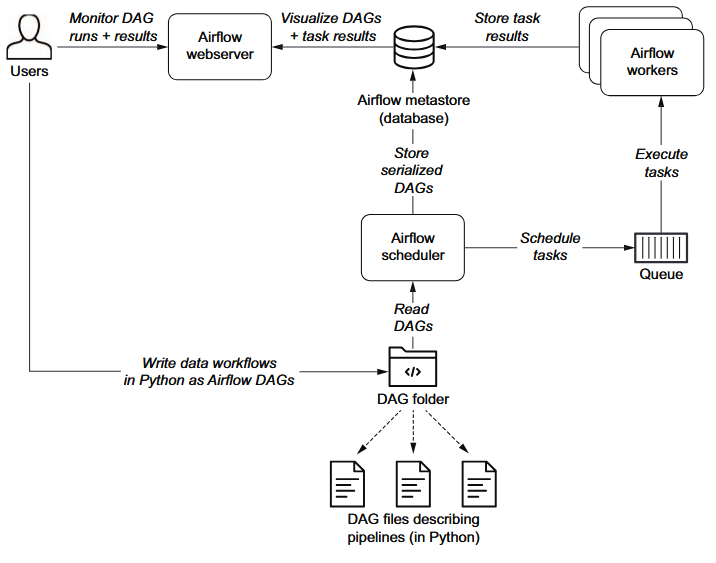

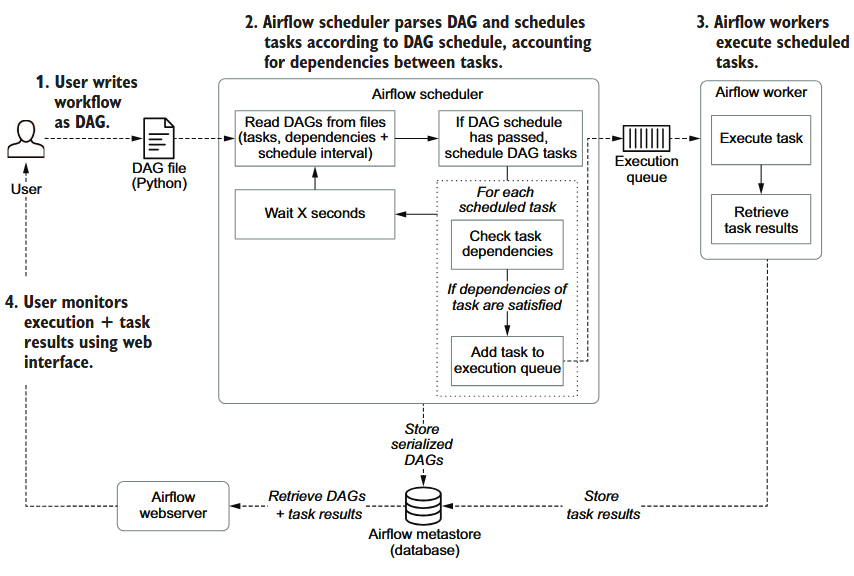

## **Arquitetura do Apache Airflow de Modo Aprofundado**

*   **triggerer**: executa deferred tasks via event loop do asyncio. quando deferred tasks não são necessárias, o triggerer também não é

*   **dag processor**: faz a análise e serialização de DAGs na metadata database de modo a evitar a sobrecarga do scheduler. por padrão faz parte do scheduler mas pode ser separado garantindo maior escalabilidade e segurança

*   **plugin**: pasta que permite estender a funcionalidade do Apache Airflow, análogo a pacotes python. os plugins são lidos pelo scheduler, dag processor, triggerer e webserver

## **Papéis de Usuários do Apache Airflow**

quando executado de modo local, por padrão, o Apache Airflow gera somente um scheduler e um webserver

a separação de componentes provê maior segurança ao isolar seus componentes, possibilitando a performance de diferentes Tasks

apesar de poder ser feito o desenvolvimento do ecossistema Apache Airflow de modo local por um único usuário, seu deploy é mais complexo necessitando de papéis de usuário que interagem com uma parte específica do sistema, garantindo segurança, como por exemplo

*   **Deployment Manager**: responsável pela instalação, configuração e gerenciamento do deploy do Apache Airflow

*   **DAG author**: responável pela definição e escrita de DAGs e sua submissão no ecossistema do Apache Airflow

*   **Operation User**: responsável pelo engatilhamento de DAGs e Tasks e o monitoramento de sua execução

# Apache Airflow - Aspectos Práticos

## **Directed-Acyclic Graph (DAG)**

fazendo o import

In [12]:
from airflow import DAG

criando a DAG

In [13]:
from datetime import datetime
with DAG(start_date=datetime.now(), 
         dag_id='primeira_dag', 
         description='teste de definição de dag não realiza nada num primeiro momento', 
         schedule='@daily'):
    pass

podemos atribuir parâmetros constantes para tasks usando o kwarg de DAG **default_args** que aceita um dicionário onde as chaves são os kwargs de tasks e os valores os valores que seriam passados àquela kwarg

uma DAG run consiste no processo de passar as tasks à queue do executor startando o seu processamento de acordo com os workers disponíveis

o status da DAG run depende diretamente do status da ultima task uma vez que se esta falhar toda a DAG run falha

o processo definido como catchup é expresso pelo kwarg **catchup=True e via CLI**. **quando False ele executa a ultima run da DAG antes de pausar**

os tipos de intervalos aceitos para o kwarg **schedule=** são os seguintes:

*   **None** = é usada para fazer trigger com base em eventos e não em datas

*   **@once** = é executada somente uma única vez

*   **@hourly** = é executada a cada hora cheia, equivalente em CRON a 0 * * * *

*   **@daily** = performa todo dia à meia noite, equivalente em CRON a 0 0 * *

*   **@weekly** = performa todo dia no inicio da semana contando como dia de inicio de semana o domingo e manhã, equivalente em CRON a 0 0 * * 0

*   **@monthly** = performa todo inicio de mês no dia 1, equivalente em CRON a 0 0 1 * *

*   **@quarterly** = performa todo inicio de trimestre à meia noite do primeiro dia do trimestre, equivalente em CRON a 0 0 1 */3 *

*   **@yearly** = performa todo inicio de ano à meia noite do primeiro dia do ano, equivalente em CRON a 0 0 1 1 *

**a notação em CRON segue o seguinte padrão e provê maior flexibilidade no schedule de DAGs:**

**segundos minutos horas dia-do-mes mes dia-da-semana [ano]**

segundos e minutos aceitam valores no intervalo 0-59, é permitido o uso dos seguintes caracteres especiais [,-*/]

horas aceitam valores no intervalo 0-23, é permitido o uso dos seguintes caracteres especiais [,-*/]

dia-do-mes aceita valores no intervalo 1-31, é permitido o uso dos seguintes caracteres especiais [,-*/?LWC]

mes aceita valores em dois tipos de intervalo 1-12 ou JAN-DEC, é permitido o uso dos seguintes caracteres especiais [,-*/]

dia-da-semana aceita valores em dois tipos de intervalo 1-7 ou SUN-SAT, é permitido o uso dos seguintes caracteres especiais [,-*/LC#]

ano é opcional mas aceita valores de 1979-2099, é permitido o uso dos seguintes caracteres especiais [,-*/]

alguns exemplos de CRON podem ser ilustrados abaixo:

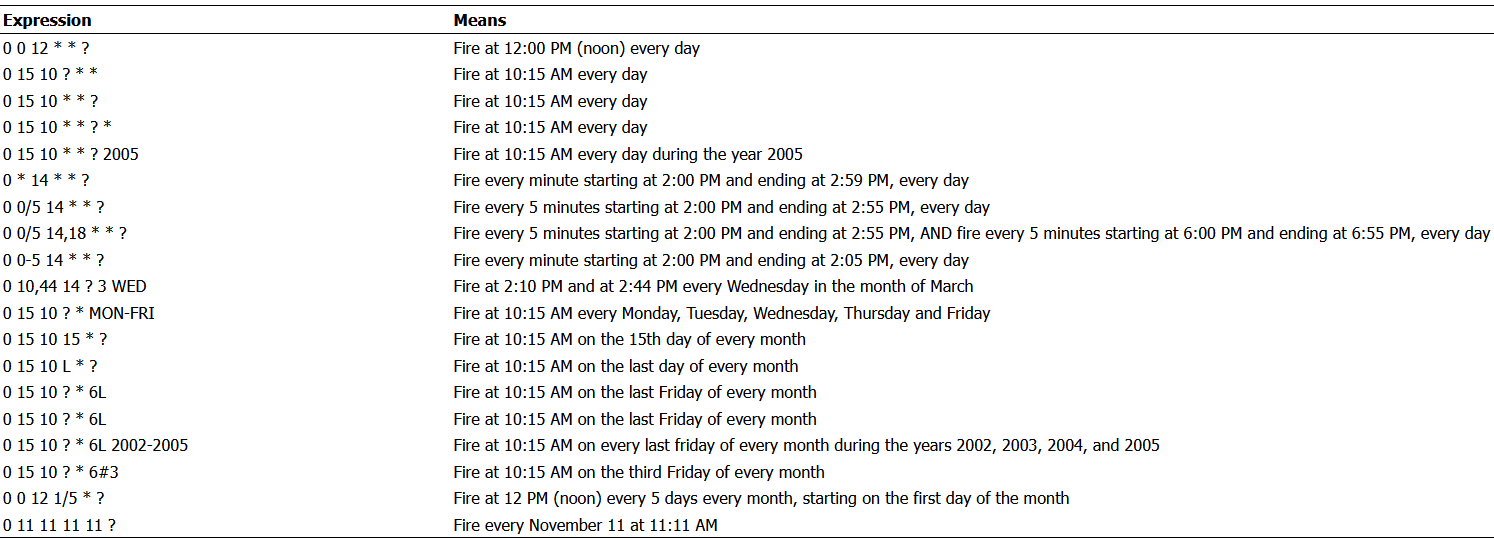

uma problemática com o CRON é que, se o tempo definido for a cada 3 dias, por exemplo, no dia 31 de um dado mês não será contabilizado para o mês seguinte. uma forma de se contornar esse erro inesperado é o uso de **timedelta objects**

## **Operators**

In [14]:
from airflow.operators.python import PythonOperator
from airflow.operators.bash import BashOperator


**a ordem dos operadores é determinada por >> ou << esta etapa é denominada de dependências**

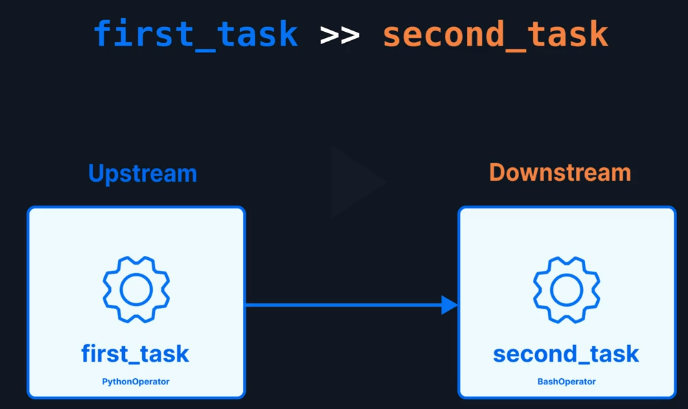

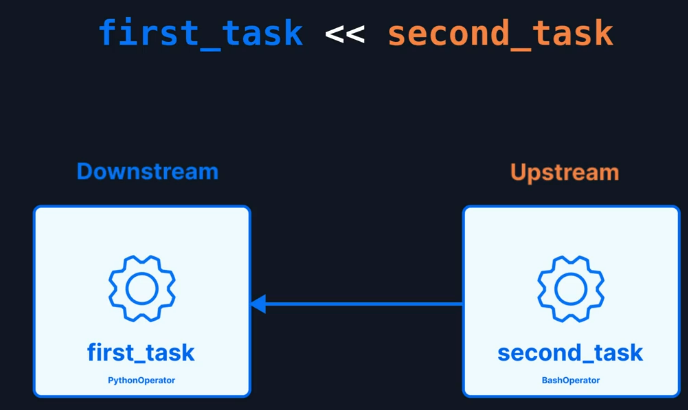

*   ****
### PythonOperator 

kwargs:

*   **task_id=** id unico da task

*   **python_callable=** função a ser executada por este operador

*   **op_args=None** uma lista de argumentos que serão desempacotadas e passadas ao python_callable

*   **op_kwargs=None** um dicionário de argumentos que serão desempacotadas e passadas ao python_callable

*   **show_return_value_in_logs=True** permite mostrar ou nao o output no log. é recomendado não usá-lo em situação de transmissão de dados com XCOM para TaskAPI

*   **templates_dict=**

*   **templates_exts=**

## **Tasks**

## **Connections**

são criadas e gerenciadas por meio da UI do airflow na **aba Admin**

**a connection_id especificada é a mesma a ser usada no pipeline/DAG para a conexão ser de sucesso**

no campo **password** o valor a ele atribuído é criptografado

o campo **extra** não criptografa os dados a ele passados

o arquivo **.env** serve para exportar variaveis de ambiente em seu projeto usando o Astro CLI

**.env serve para a criação de conexões via Astro project. nele podemos informar a URI da conexão**

após alterações no .env devemos restartar nosso projeto usando **astro dev restart** para as alterações surtirem efeito

a conexão via UI começa aparecer somente após a execução da DAG

tais conexões vão existir somente localmente, para estarem disponíveis de modo externo devemos exportá-las. uma forma de se realizar isso é via o seguinte comando no Astro CLI `astro deployment variable create --deployment-id xxxxx --load --env .env`

**Pontos Negativos de Connections do Apache Airflow**

*   se temos dois ambientes, um dev e outro prod, nao conseguimos conectá-los diretamente reaproveitando suas conexões, devemos então recriar as conexões no ambiente prod. uma forma de se evitar isso é usar **o Astro tem um gerenciador de conexões (connection manager) que faz essa ponte entre os ambientes**

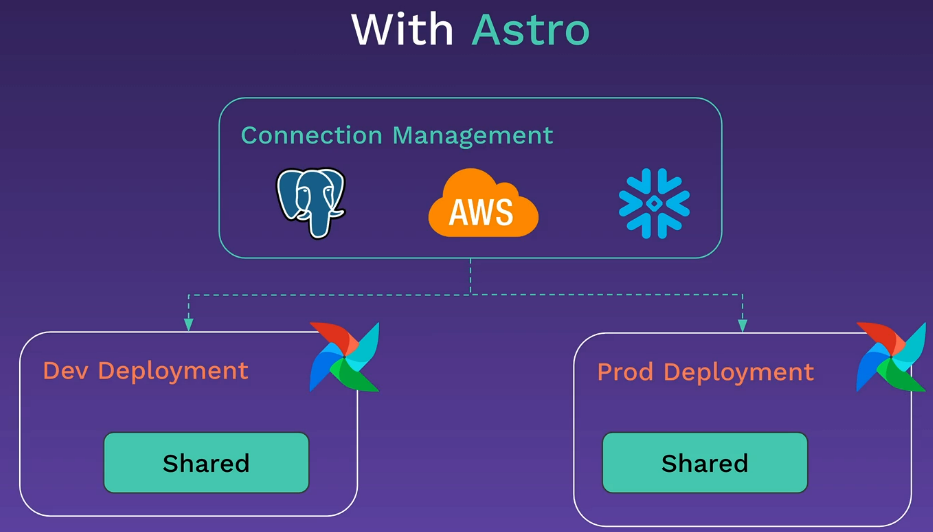

*   a criação de Connections no UI por vezes é muito genérica, necessitando de preenchimento da seção Extra (sendo esta composta de dados do tipo JSON). em situações como essas é necessário checar a documentação o que não é muito conveniente. **com o Astro, a criação de conexões se torna menos genérica, facilitando a criação de conexões**

*   não possui modelo de herança, isto é, valores são repetidos constantemente, por exemplo, de acordo com o ambiente trabalhado (dev e prod). ainda a respeito disso, quando necessário mudar de conta, todas as contas devem ser alteradas. **com Astro e seu gerenciador de conexões podemos fazer com que atributos em comum estejam armazenados de modo separado, permitindo herdar parametros em comum, reduzindo a redundância**

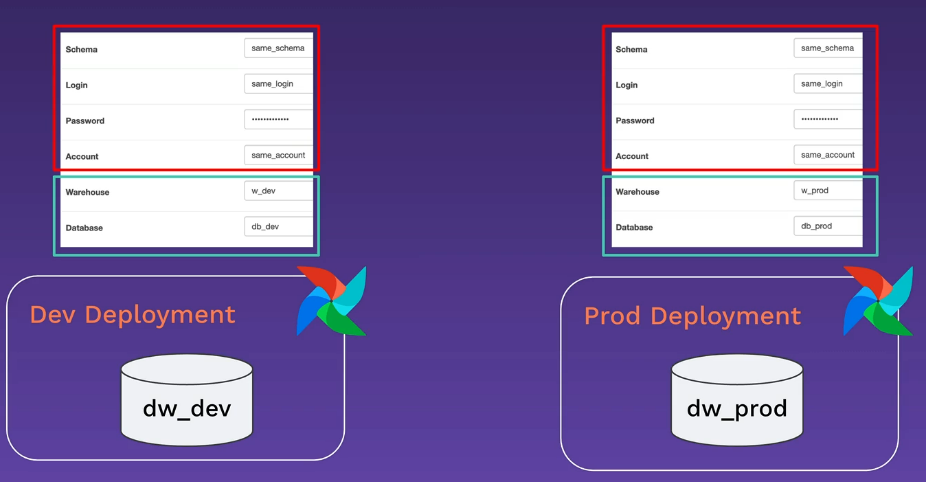

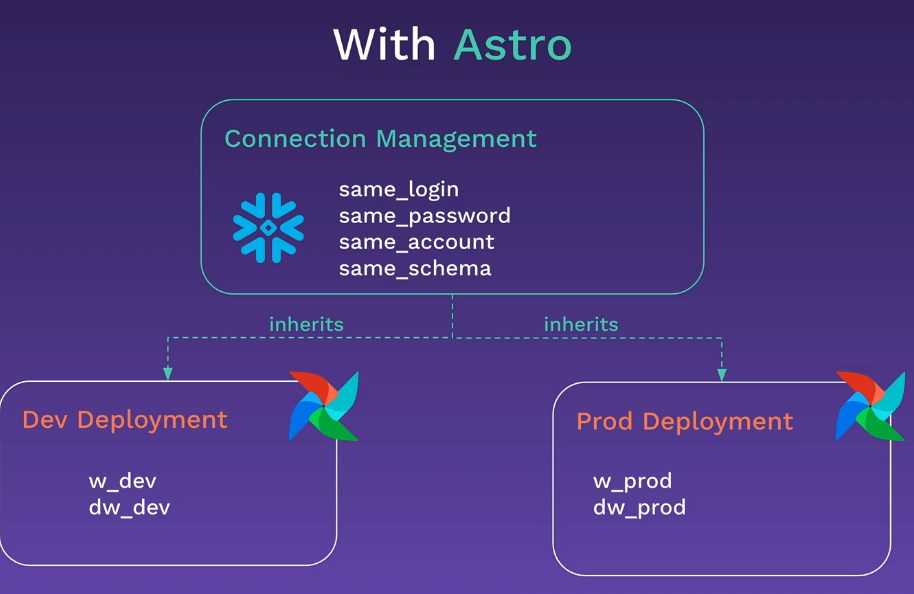

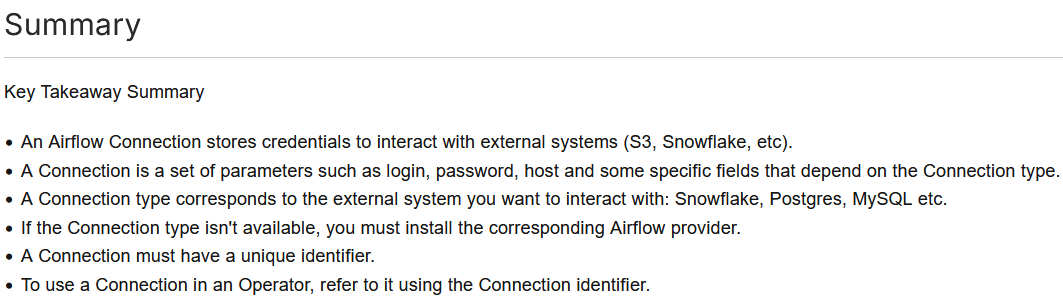

## **XCOM**

propriedades:

*   **key** = é o id da XCOM

*   **value** = é o valor serializável em JSON

*   **task_ids** = é a task que gerou a criação desse XCOM

*   **dag_id** = é a dag que contém a task que gerou a criação da XCOM

*   **timestamp** = é a data de criação da XCOM

*   **logical_date/execution_date** = é a data de execução de cada run da DAG quando a XCOM foi criada

**quando fazer a criação de tasks o parametro ti= se refere a task_instance e serve para fazer o push no metadata databaseda XCOM**

**a id de uma XCOM não necessariamente deve ser única já que diversos critérios, como por exemplo logical_date, timestamp, dag_id, dentre outros, a caracterizam**

In [15]:
#criando sem especificar parametros da XCOM
from datetime import datetime  
from airflow.decorators import dag, task 

@dag(dag_id='xcom_test',
     catchup=False,
     description='test to train xcom',
     schedule='@daily',
     start_date=datetime(2024,11,10))
def dag_xcom():

    
    @task(task_id='string') 
    def string()->str:
        return 'celular'
    

    @task
    def cellphone(mobile:str)->str:
        print(mobile[::-1])

    cellphone(string())

dag_xcom()

<DAG: xcom_test>

In [16]:
#criando especificando parametros da XCOM
from datetime import datetime  
from airflow.decorators import dag, task 
from airflow.models.taskinstance import TaskInstance as ti

@dag(dag_id='xcom_test',
     catchup=False,
     description='test to train xcom',
     schedule='@daily',
     start_date=datetime(2024,11,10))
def dag_xcom():

    
    @task(task_id='string') # task instance
    def string(ti:ti=None)->str:
        ti.xcom_push(key='xcom_test', value='celular')
    

    @task(task_id='string_2') 
    def string_2(ti:ti=None)->str:
        ti.xcom_push(key='xcom_test', value='tv')


    @task
    def cellphone(ti:ti=None)->str: # task instance
        phone = ti.xcom_pull(key='xcom_test', task_ids=['string', 'string_2'], dag_id='xcom_test')
        print(phone)

    [string(), string_2()] >> cellphone()

dag_xcom()

<DAG: xcom_test>

## **Variavéis**

**podem ser criadas via UI e são armazenadas por padrão no metadata database**

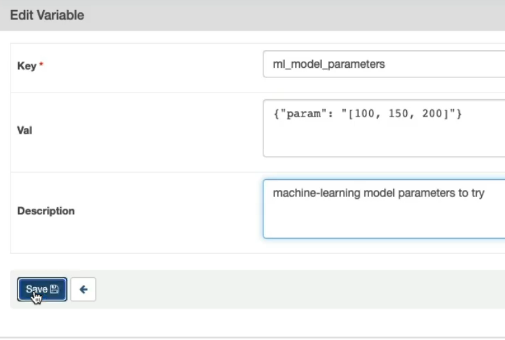

**outro modo de criação de variáveis é por meio de environment variables**

o Apache Airflow UI detecta valores sensiveis de variaveis e permite que sejam encriptografados automaticamente. **palavras como api_key automaticamente tem seus valores ocultados**

outro modo de criação de variáveis é por meio do arquivo .env. para funcionar, após a definição da variavel, é necessário reiniciar o IDE e o terminal

**variáveis criadas por meio de .env são invisíveis no Apache Airflow UI**

**variáveis podem ser armazenadas em secrets backend**

`Secrets Backend - https://academy.astronomer.io/astro-module-secrets-backend`

**vantagens de variáveis criadas por .env:**

*   o metadata database não precisa criar uma conexão para buscá-las, sendo mais rápido

*   são ocultas no Apache Airflow UI, sendo mais seguras

*   mais fácil de acompanhar as variáveis no processo de desenvolvimento

para usarmos das variáveis definidas devemos seguir o seguinte procedimento:

In [ ]:
from airflow.decorators import dag, task
from airflow.operators.python import PythonOperator
from airflow.models import Variable
from datetime import datetime


@dag(
    dag_id='dag_variable_dec',
    schedule='@daily',
    start_date=datetime(2024,11,10),
    catchup=False,
)
def dag_variable():

    for ml_model in Variable.get('ML_MODEL_PARAMETERS', deserialize_json=True)['param']: # elas vem como JSON e devemos desserializar
        
        @task
        def first_task():
            PythonOperator(
            task_id=f'ml_task_{ml_model}',
            python_callable=first_task,
            op_kwargs={
                'ml_model':ml_model
            }
        )

**usando `airflow.models.Variable` a cada iteração uma conexão é estabelecida com a metadata database**

variáveis podem ainda serem acessadas usando a notação Jinja como descrito em DAGs na seção teórica. o formato para acesso de uma variável nesse caso é: 

`{{var.value.<nome da variável>}}`

para realizar automaticamente a desserialização do JSON nesta notação procede-se da seguinte maneira:

`{{var.json.<nome da variável>}}`

**na notação Jinja não é criado uma conexão a cada requerimento sendo mais eficiente**

## **Sensores**

sensores externos podem ser adquiridos via pip

tem como padrão de **timeout=7 * 24 * 60 * 60** (7 dias)

**boas práticas de uso de sensores:**

*   sempre definir o `timeout:float=7 * 24 * 60 * 60`

*   sempre que possível e em especial de casos de longo tempo de poke usar `mode='reschedule'`

*   se o `poke_interval:float` < 5 min usar o `mode='poke'`

*   definir um `poke_interval` baseado no uso que se deseja, tendo o intuito de otimizar o processo

In [18]:
from airflow import DAG
from airflow.sensors.python import PythonSensor

def _condition():
    return False

with DAG(
    dag_id="sensor",
    start_date=datetime(2021, 1, 1),
    schedule="@daily",
    catchup=False,
):
    waiting_for_condition = PythonSensor(
        task_id="waiting_for_condition",
        python_callable=_condition,
        poke_interval=60,
        timeout=7 * 24 * 60 * 60 # segundos
    )

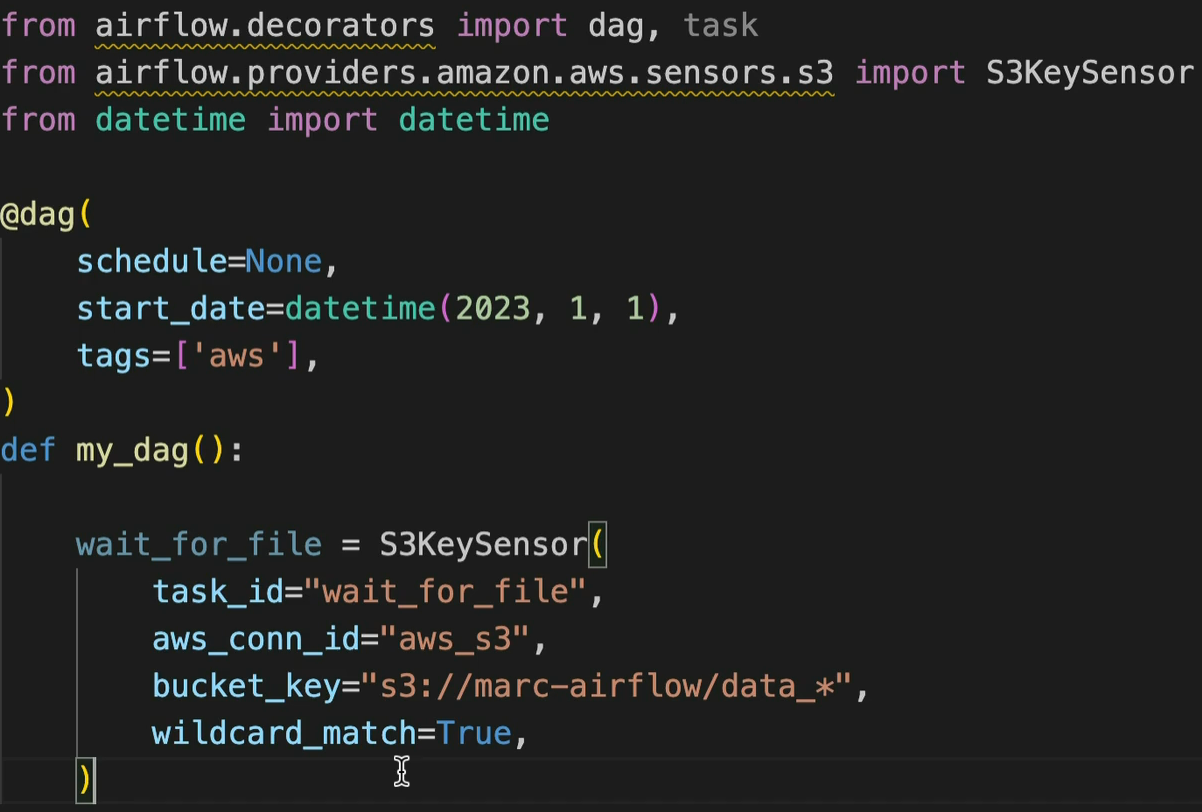

### `@task.sensor`

*   ****
kwargs

*   **mode=poke** se refere ao modo como ele funcionará. no modo **poke** ele inspeciona em intervalos de tempos específicos determinados pelo **poke_interval=** o evento. o modo poke aloca 1 slot de Worker e 1 de Pool para operar. seu funcionamento consiste em ligar e desligar esses slots nos intervalor de tempo em que ele deve rastrear; este modo e recomendado em situações onde a execução do sensor é rapida ou o tempo de poke_interval é pequeno. outro modo é o **reschedule** faz uso do slot de Worker quando somente quando necessário. este modo é recomendado em situações onde o tempo é longo


*   **poke_interaval=** determina o intervalo de rastreio do evento. **deve ser maior que 60 segundos para prevenir sobrecarga do Scheduler**

*   **timeout=** tempo limite para a Task ser considerada como falha

*   **soft_fail=False** se True ela marca a Task como SKIPPED quando ocorre a falha

*   **exponention_backoff=** prove maior tempo de intervalo entre as pokes numa escala logaritmica

*   **max_wait=** tempo máximo entre pokes pode ser `timedelta` ou `float`

*   ****
### `airflow.sensors.base.PokeReturnValue`

um objeto de retorno opcional para Sensores. tem como funcionalidade

*   ****
kwargs:

*   **is_done:bool=** se True, sinaliza que o Sensor pode finalizar o poke. se False ele fará novamente o check das condições no poke_interval dado

*   **xcom_value:Any=None** um valor de XCOM para ser transmitido após a execução do Sensor

*   ****
em suma

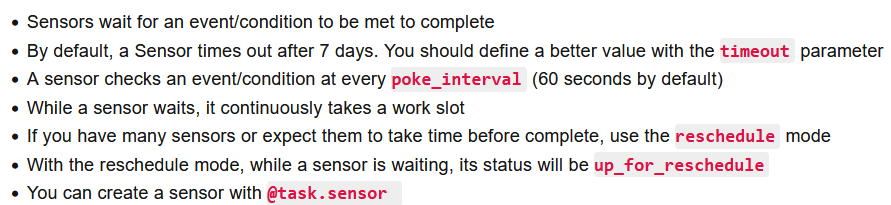

## **Debug DAGs**

fontes de erros comumns e o que fazer:

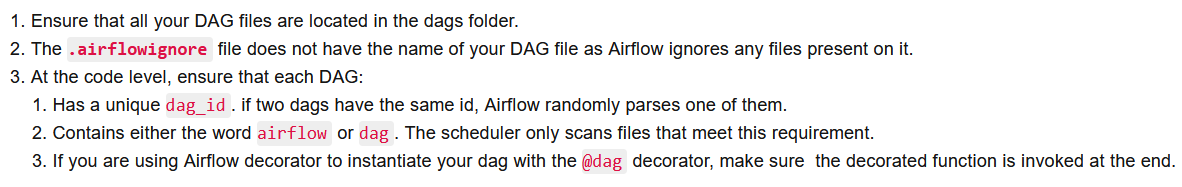

### *DAGs invisíveis no Apache Airflow UI*

*   Apache Airflow checa a cada 5 minutos se novas DAGs estão presentes na pasta dags. este tempo é definido pela configuração `dag_dir_list_interval`

*   updates de DAGs levam 30 segundos para surtirem efeitos por padrão. este tempo é definido pela configuração `min_file_process_interval`

*   em alguns casos o não-aparecimento da DAG é por conta de permissões, por tanto, é necessário checar se temos permissão

*   DAG que não seguem os requisitos de uma DAG podendo, por exemplo, ser circular

*   imports devem usar o full path partindo da pasta dags como root

**estas variáveis servem para não sobrecarregar o Scheduler, dado que este perfoma diversas ações como serialização de DAGs na metadata database, detecção de DAGs prontas para runs, transmissão de Tasks para a Queue, dentre outras**

### *DAGs não estão executando*

*   confirmar que a DAG não está pausada

*   evitar fazer o trigger da DAG imediatamente após alterações uma vez que o Scheduler pode não ter ainda feito a serialização da nova DAG na metadata database

*   garanta que a data de início é menor que a atual. caso seja data futura, a DAG será executada porém nenhuma Task será rodada com sucesso

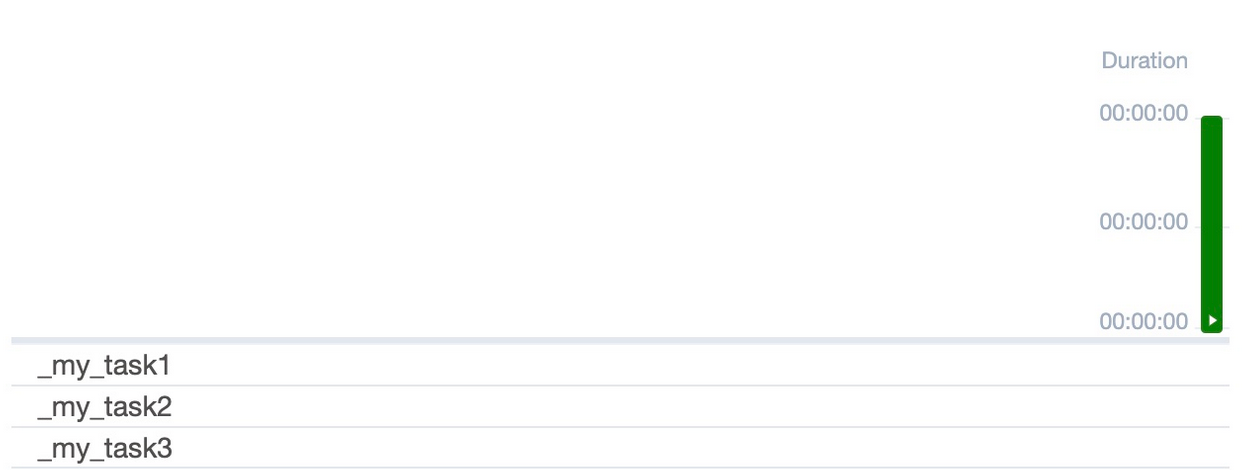

*   garanta que a data final de execução da DAG é futura, caso contrário nenhuma Task é executada

*   em situações onde é necessário varias instâncias da mesma DAG rodando paralelamente é necessário checar as seguintes configurações:

1.  verificar os valores das variaveis `max_active_runs_per_dag=16`, o número maximo de runs de DAGs ativas por DAG

2.  verificar os valores das variaveis `max_active_tasks_per_dag=16`, o numero máximo de instâncias de Tasks permitidas de rodar concorrentemente para cada DAG

3.  verificar os valores das variaveis `parallelism=32`, o numero maximo de instancias de Tasks que podem rodar paralelamente por Scheduler, independente do numero de Workers

## **Debug Scheduler**

checar se o import do provider nas configurações do projeto está sendo feita de modo adequado

## **Debug Connections**

bugs em Connections são comuns em casos onde a Connection foi criada porém somente de modo local, não foi feita a exportação dela usando o Astro CLI ou Airflow CLI. assim, quando tentado fazer a conexão via UI ela falha dado que existe somente de modo local

**testes de Connections executados em UI nem sempre podem ser feitos devido ao modo que ocorre o backend dessa funcionalidade**

**é possível o teste ter sucesso mas a Connection gerar erro e isso se deve ao teste ter sucesso no IP do webserver e não no IP do worker**

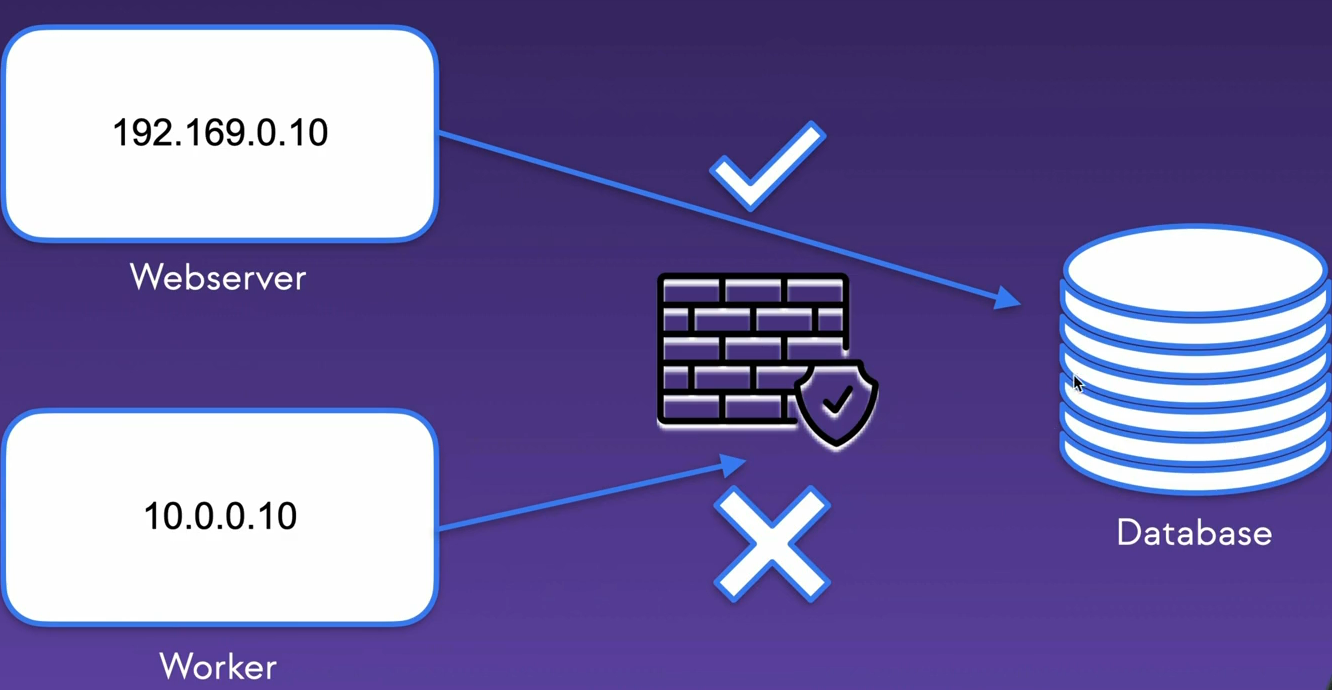

outro erro comum é não especificar o conector num Operator que extrai informações de uma Connection

sempre olhar se existem Connections no arquivo .env, dado que estes não aparecem no UI apesar de existirem

## **Conflitos de dependências (ex.: versões Python)**

para evitar erros de depêndencia é recomendado o uso de venv para cada projeto

algumas ofertas de soluções para execução de Apache Airflow em venv fornecidos pelo próprio Apache Airflow são:

*   `KubernetesPodOperator`: ideal para quem executa o Apache Airflow em Kubernetes e demandam de um maior controle sobre os recursos e infraestrutura necessários para o funcionamento das Tasks. essa solução tem como limitação sua latência de Tasks e setup mais complicado

*   `ExternalPythonOperathor`: pode usar um diferente conjunto de versões Python e suas bibliotecas. pode ser um venv ou qualquer Python pre-instalado e acessível ao Apache Airflow executar suas Tasks

*   `PythonVirtualenvOperator`: similar ao `ExternalPythonOperathor` porém, difere no fato de que aqui ele gera e deleta o venv para cada Task. ideal para situações onde a retenção do venv não é necessária. suas desvantagens são o maior tempo de execução das Tasks, que resultam em maior latência

# Astro CLI

`astro dev init <nome>` cria um projeto de Apache Airflow com seus componentes permitindo escolher, por exemplo, a versão do Apache Airflow, nome do projeto, dentre outros parametros

`astro dev start` inicia o projeto executando 4 containeres, um para cada componente do Apache Airflow (Scheduler, Webserver, Triggerer e Metadata database)

`astro dev restart` reinicializa o projeto

`astro dev stop` pausa os containeres do projeto e a UI

`astro dev run` permite a execução de comandos do Apache Airflow CLI

`astro dev run dags list` roda dags

`astro dev run dags list-import-errors` retorna os erros encontrados em cada DAG

`astro dev logs` retorna os logs do scheduler, worker e webserver para o Apache Airflow local

`astro deployment variable create --deployment-id xxxxx --load --env .env` faz a exportação de conexões, tornando a conexão funcional

`astro dev bash` abre o Apache Airflow CLI diretamente sem precisar do run

# Apache Airflow CLI

`airflow db init` inicializa a metadata database

`airflow users create` cria usuarios definindo escopos e dados de cada um

`aiflow users delete` deleta usuarios

`airflow dags list` retorna a lista de todas as DAGs na pasta dags

`airflow dags list-import-errors` retorna os erros possíveis de todas as DAGs na pasta dags

Apache Airflow CLI quando executado em docker: `docker exec -it <container_id> sh`

Apache Airflow CLI quando executado em kubernetes: `kubectl exec -it <scheduler_pod> --sh `

`airflow version` retorna a versão do Apache Airflow

`airflow info` retorna todos os providers, suas versões, ferramentas, paths, dentre outras informações no ambiente usado do Apache Airflow

`airflow config list` retorna todas as configurações do Apache Airflow e suas variáveis de ambiente 

`airflow config get-value <seção> <option>` printa o valor de uma dada configuração

`airflow cheat-sheet` retorna uma cheat sheet dos comandos do CLI

**`airflow tasks test <dag_id> <task_id> <logical_date>` permite o teste de Tasks de uma dada DAG. a Task é executada sem ter suas dependências checadas**

**`airflow dags backfill` é a interface para realizar backfill**

`airflow dags show` mostra as DAGs junto de suas dependencias